In [62]:
import pandas as pd 
df = pd.read_csv("fake_news_dataset.csv") 
df.head()

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


In [63]:
# Cell 2
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report


In [64]:
# Cell 3
all_authors = list(df['author'].unique())
len(all_authors)


17052

In [65]:
# Cell 4
all_categories = list(df['category'].unique())
len(all_categories)


7

In [66]:
# Cell 5
df['category'].value_counts()


category
Health           2922
Entertainment    2889
Technology       2882
Sports           2867
Business         2849
Politics         2802
Science          2789
Name: count, dtype: int64

In [67]:
# Cell 6
df.columns


Index(['title', 'text', 'date', 'source', 'author', 'category', 'label'], dtype='object')

In [68]:
# Cell 7
df = df[['text', 'label']]  # we are going to make prediction only upon text
df.dropna(inplace=True)     # remove rows with null values


In [69]:
# Cell 8
df['label'] = df['label'].map({'fake': 0, 'real': 1})


In [70]:
# Cell 9
df['label'].unique()


array([1, 0])

In [71]:
# Cell 10
stop_words = set([
    "the","and","is","in","to","a","of","for","on","with","as","by",
    "at","an","this","that","it","from","be","has","was","are","or",
    "but","its","have","they","their","will","can","which","about"
])


In [72]:
# Cell 11
def clean_text(text):
    text = str(text).lower()
    cleaned_words = []
    for word in text.split():
        # keep only alphabetic words longer than 2 chars and not in stop words
        word = ''.join([c for c in word if 'a' <= c <= 'z'])
        if len(word) > 2 and word not in stop_words:
            cleaned_words.append(word)
    return ' '.join(cleaned_words)

df['text'] = df['text'].apply(clean_text)


In [74]:
# Cell 12
def build_vocab(texts):
    vocab = {}
    index = 0
    for text in texts:
        for word in text.split():
            if word not in vocab:
                vocab[word] = index
                index += 1
    return vocab


In [76]:
# Cell 13
vocab = build_vocab(X_train)
vocab_size = len(vocab)
print(f"Vocabulary size after cleaning: {vocab_size}")


Vocabulary size after cleaning: 928


In [77]:
# Cell 14
X_train[3]


'road listen add question main head worker general source report cold process training provide bag election she visit lawyer security store product relate consumer inside above economic box notice nice phone until color edge month situation development realize relate several determine rule man visit main level politics people mind out would who ever able miss rule one down set around throw war full job several issue just force film manager very pass animal none stay age reason bank town team already near left husband suffer natural stock instead environment indicate provide including soldier cup others effect focus realize son identify inside finally middle decide degree whom mention hear stay music consumer beautiful kind each court painting billion health money thus what conference pay provide purpose long five same worker site another week mean test give benefit land need season factor positive partner whatever discover mission determine area health oil partner control benefit task 

In [78]:
# Cell 15
len(X_train)


16000

In [79]:
# Cell 16
df.shape[0]*0.8


16000.0

In [80]:
# Cell 17
def compute_tf(texts, vocab):
    tf = np.zeros((len(texts), len(vocab)))  # tf is matrix of size N x vocab_size
    for i, text in enumerate(texts):
        words = text.split()
        for word in words:
            if word in vocab:
                tf[i, vocab[word]] += 1
        # if len(words) > 0:
        #     tf[i] = tf[i] / len(words)
    return tf


In [81]:
# Cell 18
tf_train = compute_tf(X_train, vocab)


In [82]:
# Cell 19
tf_train[0]


array([1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 3., 2., 1.,
       2., 4., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 3., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [83]:
# Cell 20
def compute_idf(texts, vocab):
    idf = np.zeros(len(vocab))
    N = len(texts)
    for word, idx in vocab.items():
        doc_count = 0
        for text in texts:
            if word in text.split():
                doc_count += 1
        if doc_count == 0:
            idf[idx] = 0
        else:
            idf[idx] = N / doc_count
    return idf


In [84]:
# Cell 20
def compute_idf(texts, vocab):
    idf = np.zeros(len(vocab))
    N = len(texts)
    for word, idx in vocab.items():
        doc_count = 0
        for text in texts:
            if word in text.split():
                doc_count += 1
        if doc_count == 0:
            idf[idx] = 0
        else:
            idf[idx] = N / doc_count
    return idf


In [85]:
# Cell 21
# changes from vivid1680
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words="english"
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF shape:", X_train_tfidf.shape)


TF-IDF shape: (16000, 759)


In [86]:
# Cell 22
idf_values = tfidf.idf_  # idf values


In [87]:
# Cell 23
idf_values[7]


np.float64(2.4936637121553558)

In [88]:
# Cell 24
tfidf_train = X_train_tfidf


In [89]:
# Cell 25
tfidf_train.shape


(16000, 759)

In [90]:
# Cell 26
X_test_tfidf = tfidf.transform(X_test)


In [91]:
# Cell 27
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Train SVM on TF-IDF features
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)  # use X_train_tfidf

# Predict on test set
y_pred = svm.predict(X_test_tfidf)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.51175
              precision    recall  f1-score   support

           0       0.52      0.51      0.51      2029
           1       0.50      0.52      0.51      1971

    accuracy                           0.51      4000
   macro avg       0.51      0.51      0.51      4000
weighted avg       0.51      0.51      0.51      4000



In [92]:
# Cell 1: Ensure important columns exist
required_cols = ['text', 'label', 'category', 'source', 'date']
for col in required_cols:
    if col not in df.columns:
        df[col] = None  # Add column if missing to avoid errors


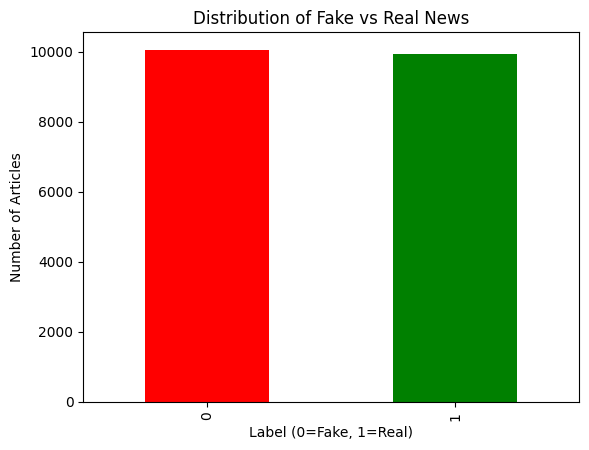

In [93]:
# Cell 2: Distribution of Fake vs Real News
if 'label' in df.columns:
    df['label'].value_counts().plot(kind='bar', color=['red','green'])
    plt.title('Distribution of Fake vs Real News')
    plt.ylabel('Number of Articles')
    plt.xlabel('Label (0=Fake, 1=Real)')
    plt.show()


In [96]:
# Cell 3: Distribution of News Categories
import matplotlib.pyplot as plt
if 'category' in df.columns and df['category'].notna().any():
    df['category'].value_counts().plot(kind='barh', color='skyblue')
    plt.title('Distribution of News Categories')
    plt.xlabel('Number of Articles')
    plt.ylabel('Category')
    plt.show()


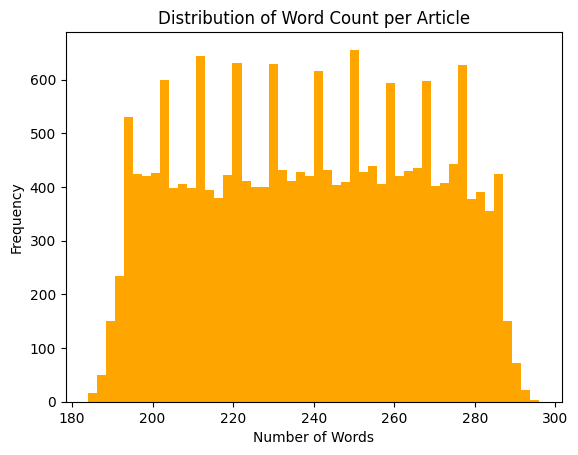

In [97]:
# Cell 4: Histogram of Word Count per Article
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
plt.hist(df['word_count'], bins=50, color='orange')
plt.title('Distribution of Word Count per Article')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


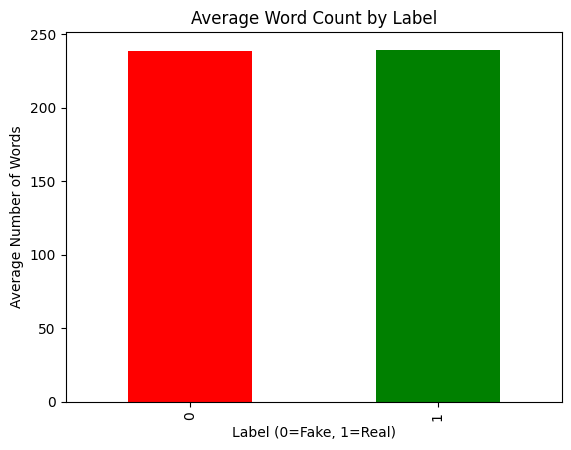

In [98]:
# Cell 5: Average Word Count by Label
if 'label' in df.columns:
    df.groupby('label')['word_count'].mean().plot(kind='bar', color=['red','green'])
    plt.title('Average Word Count by Label')
    plt.ylabel('Average Number of Words')
    plt.xlabel('Label (0=Fake, 1=Real)')
    plt.show()


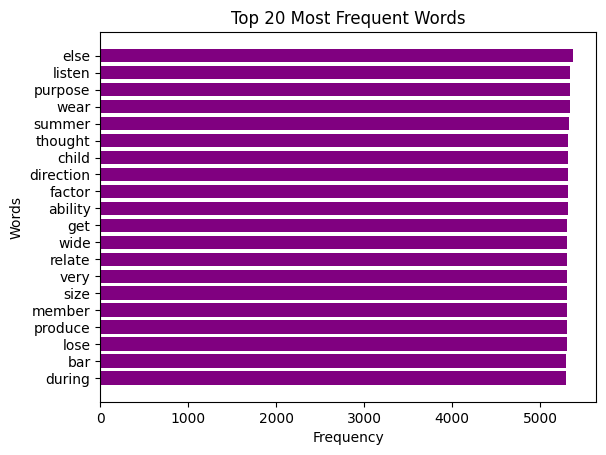

In [99]:
# Cell 6: Top 20 Most Frequent Words
from collections import Counter

all_words = ' '.join(df['text'].dropna()).lower().split()
most_common = Counter(all_words).most_common(20)
if most_common:
    words, counts = zip(*most_common)
    plt.barh(words, counts, color='purple')
    plt.title('Top 20 Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.gca().invert_yaxis()
    plt.show()


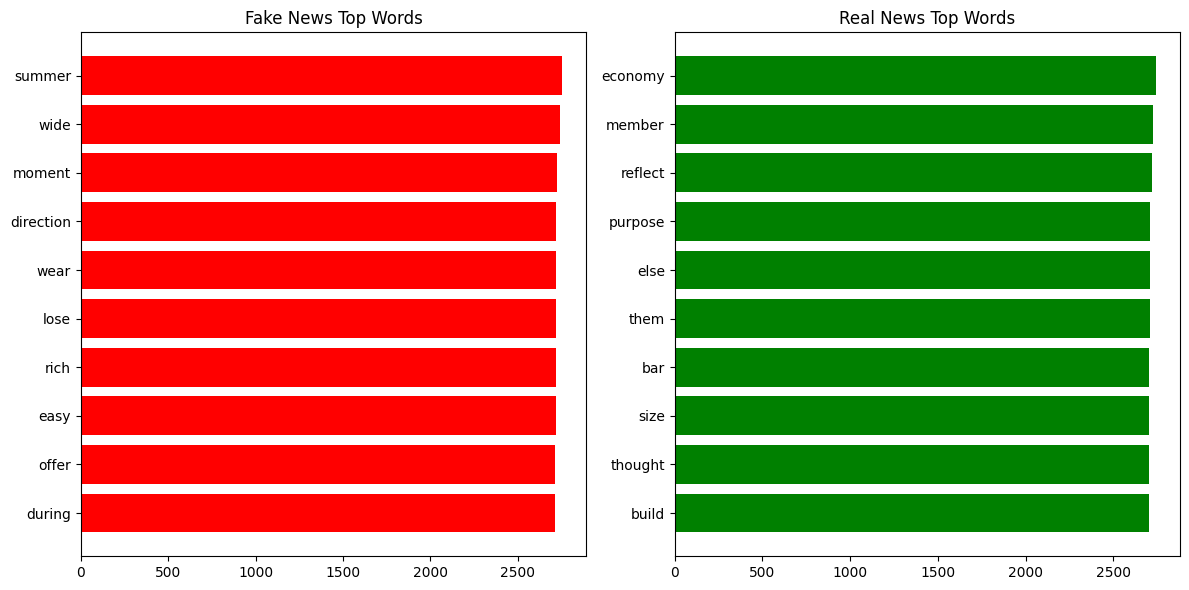

In [100]:
# Cell 7: Top Words in Fake vs Real News
fake_texts = df[df['label']==0]['text'].dropna() if 'label' in df.columns else []
real_texts = df[df['label']==1]['text'].dropna() if 'label' in df.columns else []

if len(fake_texts) > 0 and len(real_texts) > 0:
    fake_words = ' '.join(fake_texts).lower().split()
    real_words = ' '.join(real_texts).lower().split()
    fake_common = Counter(fake_words).most_common(10)
    real_common = Counter(real_words).most_common(10)

    if fake_common and real_common:
        fake_labels, fake_counts = zip(*fake_common)
        real_labels, real_counts = zip(*real_common)

        fig, axes = plt.subplots(1,2, figsize=(12,6))
        axes[0].barh(fake_labels, fake_counts, color='red')
        axes[0].set_title('Fake News Top Words')
        axes[0].invert_yaxis()

        axes[1].barh(real_labels, real_counts, color='green')
        axes[1].set_title('Real News Top Words')
        axes[1].invert_yaxis()

        plt.tight_layout()
        plt.show()


In [109]:
print(df.columns.tolist())


['text', 'label', 'category', 'source', 'date', 'word_count', 'year']


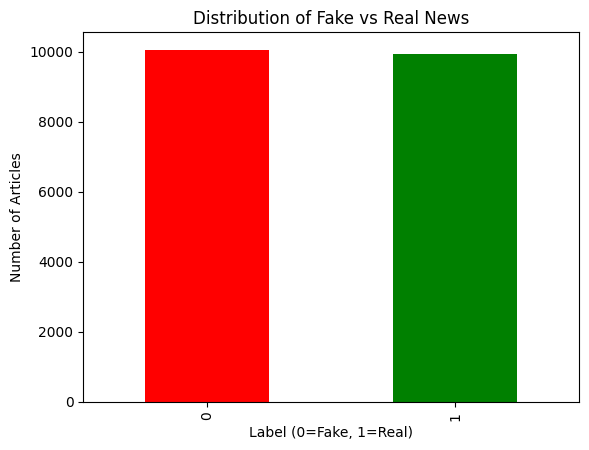

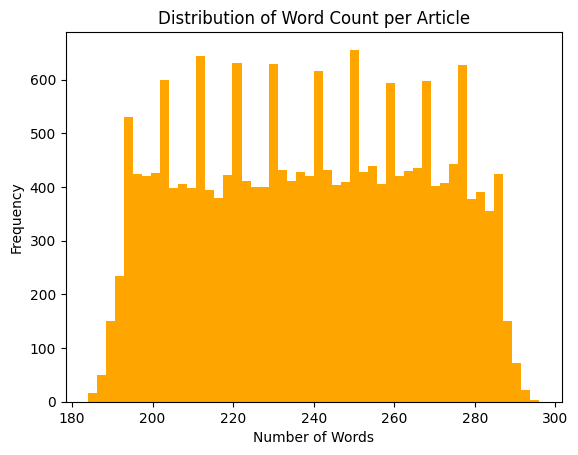

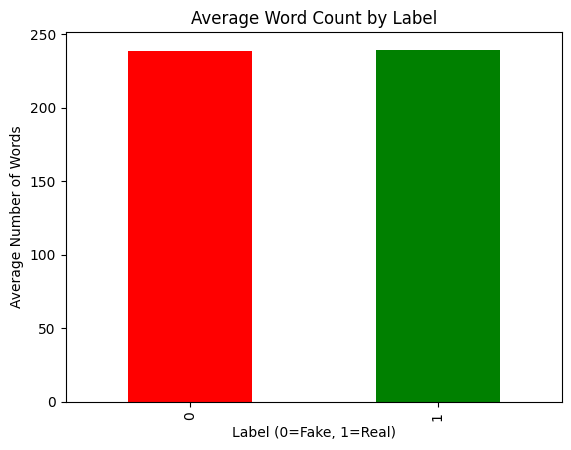

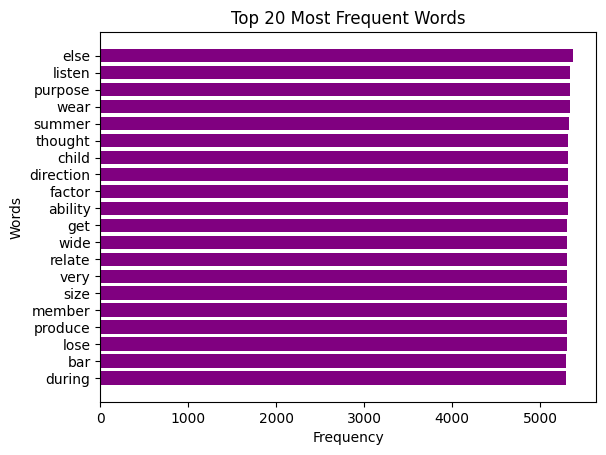

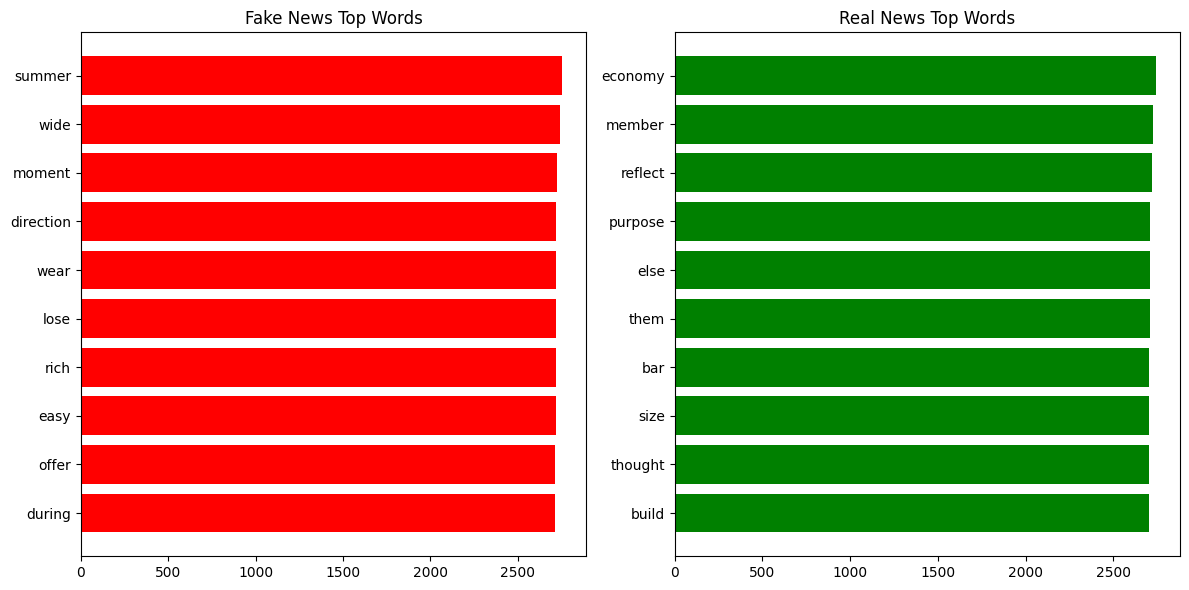

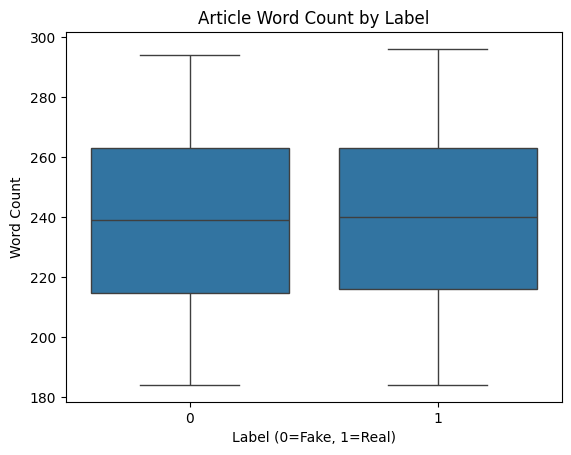

In [107]:
# -------------------------------
# FULL VISUALIZATION CELL WITH COMMENTS
# -------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# -------------------------------
# 0️⃣ Ensure important columns exist
# -------------------------------
required_cols = ['text', 'label', 'category', 'source', 'date']
for col in required_cols:
    if col not in df.columns:
        df[col] = None  # Add column if missing to avoid errors

# -------------------------------
# 1️⃣ Distribution of Fake vs Real News
# -------------------------------
if 'label' in df.columns:
    df['label'].value_counts().plot(kind='bar', color=['red','green'])
    plt.title('Distribution of Fake vs Real News')
    plt.ylabel('Number of Articles')
    plt.xlabel('Label (0=Fake, 1=Real)')
    plt.show()

# -------------------------------
# 2️⃣ Distribution of News Categories
# -------------------------------
if 'category' in df.columns and df['category'].notna().any():
    df['category'].value_counts().plot(kind='barh', color='skyblue')
    plt.title('Distribution of News Categories')
    plt.xlabel('Number of Articles')
    plt.ylabel('Category')
    plt.show()

# -------------------------------
# 3️⃣ Histogram of Word Count per Article
# -------------------------------
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
plt.hist(df['word_count'], bins=50, color='orange')
plt.title('Distribution of Word Count per Article')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# -------------------------------
# 4️⃣ Average Word Count by Label
# -------------------------------
if 'label' in df.columns:
    df.groupby('label')['word_count'].mean().plot(kind='bar', color=['red','green'])
    plt.title('Average Word Count by Label')
    plt.ylabel('Average Number of Words')
    plt.xlabel('Label (0=Fake, 1=Real)')
    plt.show()

# -------------------------------
# 5️⃣ Top 20 Most Frequent Words
# -------------------------------
all_words = ' '.join(df['text'].dropna()).lower().split()
most_common = Counter(all_words).most_common(20)
if most_common:
    words, counts = zip(*most_common)
    plt.barh(words, counts, color='purple')
    plt.title('Top 20 Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.gca().invert_yaxis()
    plt.show()

# -------------------------------
# 6️⃣ Top Words in Fake vs Real News
# -------------------------------
fake_texts = df[df['label']==0]['text'].dropna() if 'label' in df.columns else []
real_texts = df[df['label']==1]['text'].dropna() if 'label' in df.columns else []

if len(fake_texts) > 0 and len(real_texts) > 0:
    fake_words = ' '.join(fake_texts).lower().split()
    real_words = ' '.join(real_texts).lower().split()
    fake_common = Counter(fake_words).most_common(10)
    real_common = Counter(real_words).most_common(10)

    if fake_common and real_common:
        fake_labels, fake_counts = zip(*fake_common)
        real_labels, real_counts = zip(*real_common)

        fig, axes = plt.subplots(1,2, figsize=(12,6))
        axes[0].barh(fake_labels, fake_counts, color='red')
        axes[0].set_title('Fake News Top Words')
        axes[0].invert_yaxis()

        axes[1].barh(real_labels, real_counts, color='green')
        axes[1].set_title('Real News Top Words')
        axes[1].invert_yaxis()

        plt.tight_layout()
        plt.show()

# -------------------------------
# 7️⃣ Top 10 News Sources
# -------------------------------
if 'source' in df.columns and df['source'].notna().any():
    df['source'].value_counts().head(10).plot(kind='bar', color='cyan')
    plt.title('Top 10 News Sources')
    plt.xlabel('News Source')
    plt.ylabel('Number of Articles')
    plt.show()

# -------------------------------
# 8️⃣ News Over Time
# -------------------------------
if 'date' in df.columns and df['date'].notna().any():
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['year'] = df['date'].dt.year
    df.groupby('year')['label'].count().plot(kind='line', marker='o', color='blue')
    plt.title('Number of News Articles Over Years')
    plt.xlabel('Year')
    plt.ylabel('Number of Articles')
    plt.show()

# -------------------------------
# 9️⃣ Article Length Distribution by Label (Boxplot)
# -------------------------------
if 'label' in df.columns:
    sns.boxplot(x='label', y='word_count', data=df)
    plt.title('Article Word Count by Label')
    plt.xlabel('Label (0=Fake, 1=Real)')
    plt.ylabel('Word Count')
    plt.show()

# -------------------------------
# 🔟 Stacked Bar: Label vs Category
# -------------------------------
if 'category' in df.columns and 'label' in df.columns:
    if not df['category'].isna().all():
        pd.crosstab(df['category'], df['label']).plot(kind='bar', stacked=True, color=['red','green'])
        plt.title('News Labels by Category')
        plt.xlabel('Category')
        plt.ylabel('Number of Articles')
        plt.show()


In [110]:
# Top 10 News Sources Robust
if 'source' in df.columns and df['source'].dropna().any():
    top_sources = df['source'].value_counts().head(10)
    top_sources.plot(kind='bar', color='cyan')
    plt.title('Top 10 News Sources by Number of Articles')
    plt.xlabel('News Source')
    plt.ylabel('Number of Articles')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Source column exists but has no valid data.")


Source column exists but has no valid data.
